In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# 9-2. 셸로우 포커스 만들기 (1) 사진을 준비하자

(427, 640, 3)


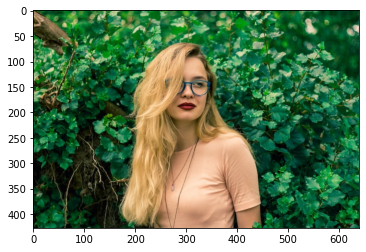

In [3]:
#준비한 이미지 읽기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image2.jpg' 
img_orig = cv2.imread(img_path)
print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))
plt.show()

# 9-3. 셸로우 포커스 만들기 (2) 세그멘테이션으로 사람 분리하기

In [ ]:
# 시맨틱 세그멘테이션(semantic segmentation)이란?
# 이미지에서 픽셀을 사람, 자동차, 비행기 등의 물리적 단위로 분류(classification)하는 방법

# 9-4. 셸로우 포커스 만들기 (3) 시맨틱 세그멘테이션 다뤄보기

### DeepLab이라는 세그멘테이션 모델을 이용

### PixelLib에서 제공해 주는 모델을 다운로드합니다.

In [5]:
model_dir = "./models/"
model_file = os.path.join(model_dir,'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
#model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
#urllib.request.urlretrieve(model_url,model_file)

In [6]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [7]:
segvalues,output = model.segmentAsPascalvoc(img_path)

In [8]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
print(len(LABEL_NAMES))

21


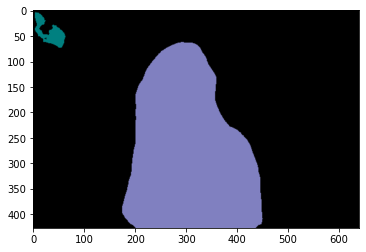

In [9]:
plt.imshow(output)
plt.show()

In [10]:
segvalues

{'class_ids': array([ 0,  3, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [11]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bird
person


In [12]:
colormap = np.zeros((256,3),dtype=int)
ind = np.arange(256,dtype=int) #0~255사이의 숫자가 담긴다. 

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:,channel] |= ((ind>>channel)&1) << shift
    ind >>=3
    
colormap[:20]
#print(len(colormap))

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [13]:
colormap[15] #person이 8번 인덱스에 있음.

array([192, 128, 128])

In [14]:
seg_color = (128,128,192) #(192,128,128)을 rgb로 바꿔주어야 함.

(427, 640)


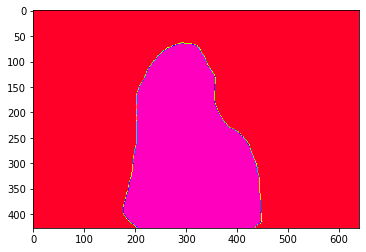

In [15]:
seg_map = np.all(output==seg_color,axis=-1)
print(seg_map.shape)
plt.imshow(seg_map,cmap='gist_rainbow')
plt.show()

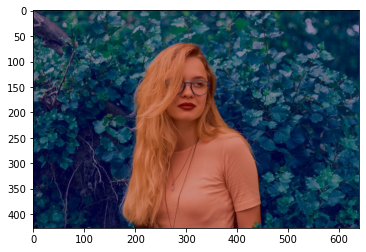

In [16]:
img_show = img_orig.copy() #img_show란 원본 이미지를 말한다. 
img_mask = seg_map.astype(np.uint8) * 255 #위의 seg_map은 true, false로 이루어져 있는데 이걸 int로 바꾸고 0,255로 바꿔준다. (흑, 백으로 전환)
color_mask = cv2.applyColorMap(img_mask,cv2.COLORMAP_JET) #흑백이미지에 컬러를 입혀주고 이걸 color_mask라고 한다. 
img_show = cv2.addWeighted(img_show,0.6,color_mask,0.4,0.0) #원본 이미지와 컬러 마스크를 합성한다. 
plt.imshow(cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB))
plt.show()

# 9-5. 셸로우 포커스 만들기 (4) 배경 흐리게 하기

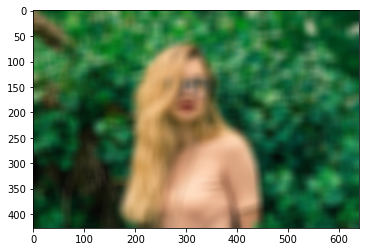

In [18]:
#img_orig_blur는 전체 이미지를 blur 처리한다. 
img_orig_blur = cv2.blur(img_orig,(20,20)) #20만큼 흐리게 해주기 
plt.imshow(cv2.cvtColor(img_orig_blur,cv2.COLOR_BGR2RGB))
plt.show()

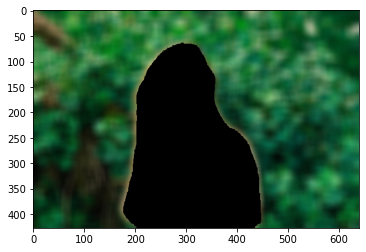

In [19]:
img_mask_color = cv2.cvtColor(img_mask,cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 9-6. 셸로우 포커스 만들기 (5) 흐린 배경과 원본 영상 합성

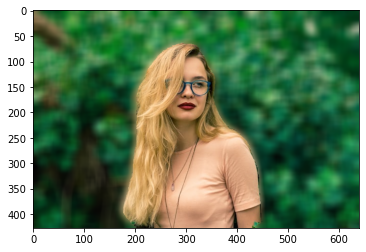

In [20]:
img_concat = np.where(img_mask_color==255,img_orig,img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat,cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# 9-2. 셸로우 포커스 만들기 (1) 사진을 준비하자

(828, 640, 3)


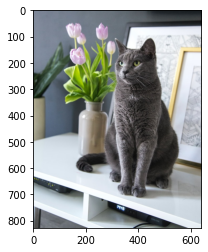

In [2]:
#준비한 이미지 읽기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.jpg' 
img_orig = cv2.imread(img_path)
print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))
plt.show()

# 9-3. 셸로우 포커스 만들기 (2) 세그멘테이션으로 사람 분리하기

In [ ]:
# 시맨틱 세그멘테이션(semantic segmentation)이란?
# 이미지에서 픽셀을 사람, 자동차, 비행기 등의 물리적 단위로 분류(classification)하는 방법

# 9-4. 셸로우 포커스 만들기 (3) 시맨틱 세그멘테이션 다뤄보기

### DeepLab이라는 세그멘테이션 모델을 이용

### PixelLib에서 제공해 주는 모델을 다운로드합니다.

In [3]:
model_dir = "./models/"
model_file = os.path.join(model_dir,'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
#model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
#urllib.request.urlretrieve(model_url,model_file)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
segvalues,output = model.segmentAsPascalvoc(img_path)

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
print(len(LABEL_NAMES))

21
background
chair
person


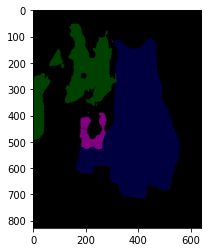

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0,  5,  8, 16]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
cat
pottedplant


In [11]:
colormap = np.zeros((256,3),dtype=int)
ind = np.arange(256,dtype=int) #0~255사이의 숫자가 담긴다. 

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:,channel] |= ((ind>>channel)&1) << shift
    ind >>=3
    
colormap[:20]
#print(len(colormap))

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [12]:
colormap[8] #cat이 8번 인덱스에 있음.

array([64,  0,  0])

In [13]:
seg_color = (0,0,64) #(64,0,0)을 rgb로 바꿔주어야 함.

(828, 640)


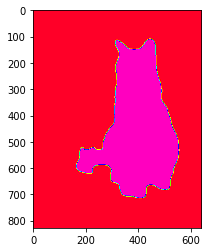

In [14]:
seg_map = np.all(output==seg_color,axis=-1)
print(seg_map.shape)
plt.imshow(seg_map,cmap='gist_rainbow')
plt.show()

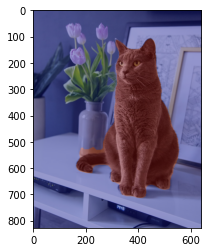

In [15]:
img_show = img_orig.copy() #img_show란 원본 이미지를 말한다. 
img_mask = seg_map.astype(np.uint8) * 255 #위의 seg_map은 true, false로 이루어져 있는데 이걸 int로 바꾸고 0,255로 바꿔준다. (흑, 백으로 전환)
color_mask = cv2.applyColorMap(img_mask,cv2.COLORMAP_JET) #흑백이미지에 컬러를 입혀주고 이걸 color_mask라고 한다. 
img_show = cv2.addWeighted(img_show,0.6,color_mask,0.4,0.0) #원본 이미지와 컬러 마스크를 합성한다. 
plt.imshow(cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB))
plt.show()

# 9-5. 셸로우 포커스 만들기 (4) 배경 흐리게 하기

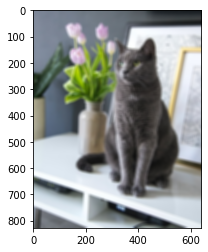

In [16]:
#img_orig_blur는 전체 이미지를 blur 처리한다. 
img_orig_blur = cv2.blur(img_orig,(13,13))
plt.imshow(cv2.cvtColor(img_orig_blur,cv2.COLOR_BGR2RGB))
plt.show()

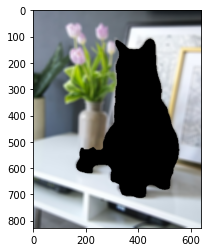

In [17]:
img_mask_color = cv2.cvtColor(img_mask,cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 9-6. 셸로우 포커스 만들기 (5) 흐린 배경과 원본 영상 합성

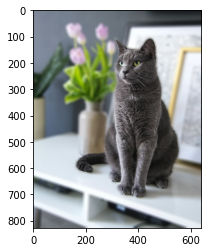

In [18]:
img_concat = np.where(img_mask_color==255,img_orig,img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat,cv2.COLOR_BGR2RGB))
plt.show()

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

# 9-2. 셸로우 포커스 만들기 (1) 사진을 준비하자

(427, 640, 3)


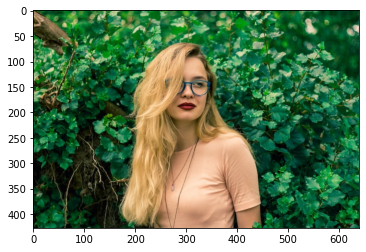

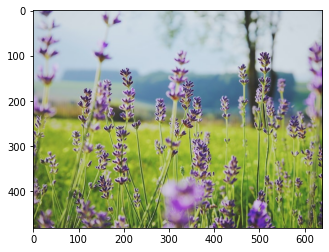

In [2]:
#준비한 이미지 읽기
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image2.jpg'
flower_bg_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/flower_bg.jpg' #뒤에 합성할 배경 이미지 경로
img_orig = cv2.imread(img_path)
bg_img = cv2.imread(flower_bg_path) #뒤에 합성할 배경 이미지
print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(bg_img,cv2.COLOR_BGR2RGB))
plt.show()

# 9-3. 셸로우 포커스 만들기 (2) 세그멘테이션으로 사람 분리하기

In [ ]:
# 시맨틱 세그멘테이션(semantic segmentation)이란?
# 이미지에서 픽셀을 사람, 자동차, 비행기 등의 물리적 단위로 분류(classification)하는 방법

# 9-4. 셸로우 포커스 만들기 (3) 시맨틱 세그멘테이션 다뤄보기

### DeepLab이라는 세그멘테이션 모델을 이용

### PixelLib에서 제공해 주는 모델을 다운로드합니다.

In [3]:
model_dir = "./models/"
model_file = os.path.join(model_dir,'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
#model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'
#urllib.request.urlretrieve(model_url,model_file)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
segvalues,output = model.segmentAsPascalvoc(img_path)

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
print(len(LABEL_NAMES))

21


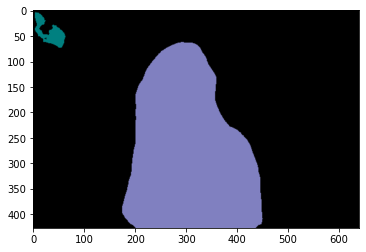

In [7]:
plt.imshow(output)
plt.show()

In [8]:
segvalues

{'class_ids': array([ 0,  3, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bird
person


In [10]:
colormap = np.zeros((256,3),dtype=int)
ind = np.arange(256,dtype=int) #0~255사이의 숫자가 담긴다. 

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:,channel] |= ((ind>>channel)&1) << shift
    ind >>=3
    
colormap[:20]
#print(len(colormap))

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15] #person이 8번 인덱스에 있음.

array([192, 128, 128])

In [12]:
seg_color = (128,128,192) #(192,128,128)을 rgb로 바꿔주어야 함.

(427, 640)


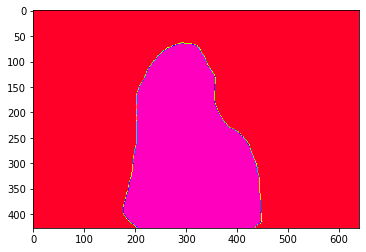

In [13]:
seg_map = np.all(output==seg_color,axis=-1)
print(seg_map.shape)
plt.imshow(seg_map,cmap='gist_rainbow')
plt.show()

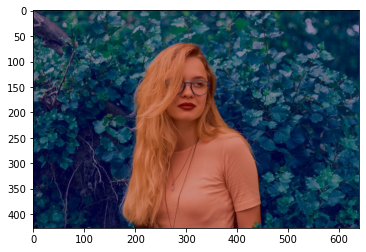

In [14]:
img_show = img_orig.copy() #img_show란 원본 이미지를 말한다. 
img_mask = seg_map.astype(np.uint8) * 255 #위의 seg_map은 true, false로 이루어져 있는데 이걸 int로 바꾸고 0,255로 바꿔준다. (흑, 백으로 전환)
color_mask = cv2.applyColorMap(img_mask,cv2.COLORMAP_JET) #흑백이미지에 컬러를 입혀주고 이걸 color_mask라고 한다. 
img_show = cv2.addWeighted(img_show,0.6,color_mask,0.4,0.0) #원본 이미지와 컬러 마스크를 합성한다. 
plt.imshow(cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB))
plt.show()

# 9-5. 셸로우 포커스 만들기 (4) 배경 흐리게 하기

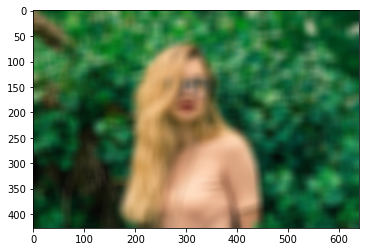

In [15]:
#img_orig_blur는 전체 이미지를 blur 처리한다. 
img_orig_blur = cv2.blur(img_orig,(20,20)) #20만큼 흐리게 해주기 
plt.imshow(cv2.cvtColor(img_orig_blur,cv2.COLOR_BGR2RGB))
plt.show()

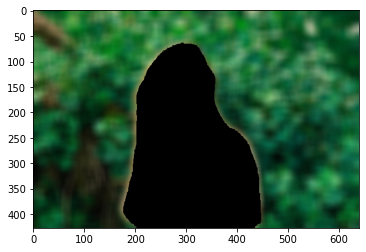

In [16]:
img_mask_color = cv2.cvtColor(img_mask,cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 9-6. 셸로우 포커스 만들기 (5) 흐린 배경과 원본 영상 합성

In [20]:
#아래에서 새로운 배경 이미지와 원본 이미지를 합성하려고 했더니 shape이 달라서 오류 발생함.
#Bg_img를 크롭해주고 shape을 맞춰줌. 
print(img_mask_color.shape)
print(img_orig.shape)
cropped_bg_img = bg_img[:427,:]
print(cropped_bg_img.shape) #크롭한 이미지의 shape
print(bg_img.shape)  #원본 이미지 shape

(427, 640, 3)
(427, 640, 3)
(427, 640, 3)
(481, 640, 3)


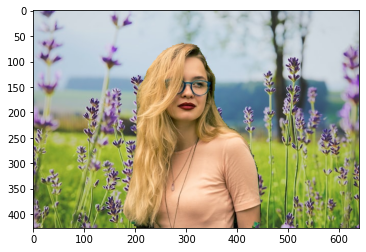

In [21]:
img_concat = np.where(img_mask_color==255,img_orig,cropped_bg_img)
plt.imshow(cv2.cvtColor(img_concat,cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
import cv2
from matplotlib import pyplot as plt

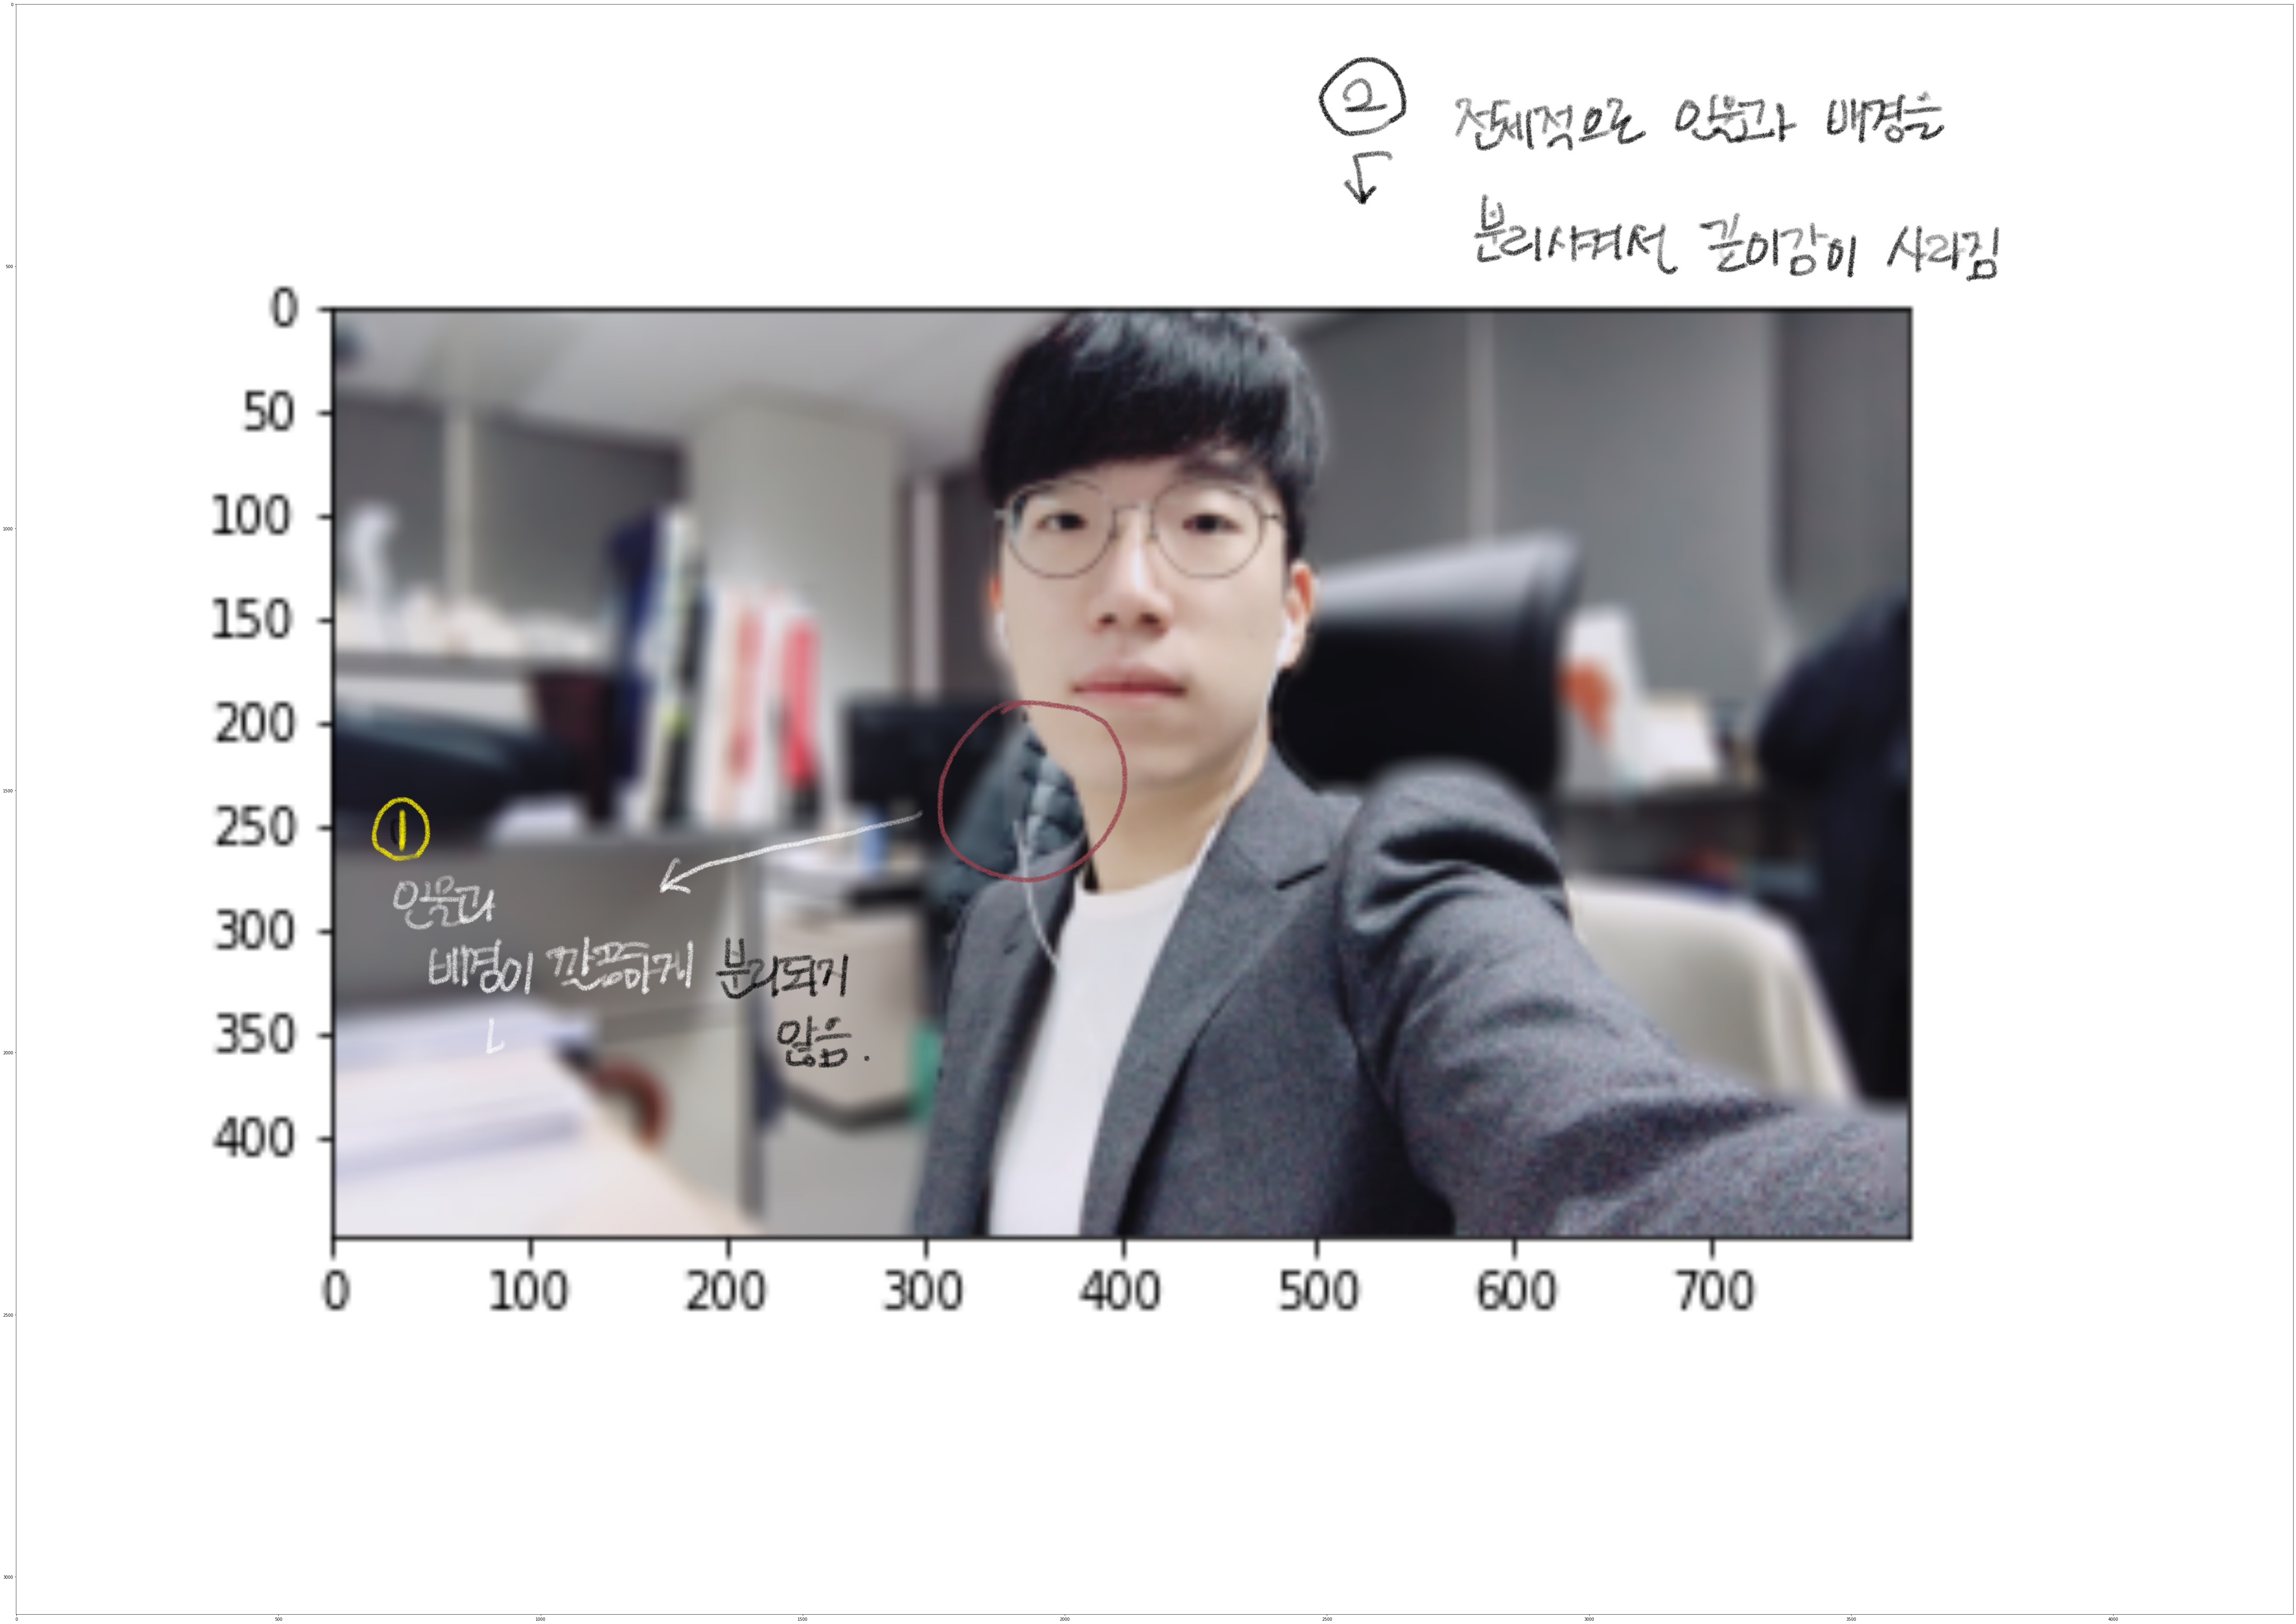

In [9]:
img_path = './images/step2_problem.jpeg' 
img_orig = cv2.imread(img_path)
plt.figure(figsize=(100,80))
plt.imshow(cv2.cvtColor(img_orig,cv2.COLOR_BGR2RGB))
plt.show()